In [1]:
#Inizializzazione 
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd

import datetime as dt

py.init_notebook_mode(connected=True)
df= pd.read_csv("Chicago_Crimes_2012_to_2017.csv", keep_default_na=False)


array = df['Date'].values
months_counter = np.zeros(12)




days = list()
months = list()
days_with_counter = dict()


for i in range(0,len(array)):
    day = dt.datetime.strptime(array[i], "%m/%d/%Y %H:%M:%S %p").day
    current_month = dt.datetime.strptime(array[i], "%m/%d/%Y %H:%M:%S %p").month
    days.append(str(day)+" / "+str(current_month))
    
    if(days[i] not in days_with_counter):
        days_with_counter[days[i]] = 1
    else:
        days_with_counter[days[i]] = days_with_counter[days[i]] + 1
    #months.append(dt.datetime.strptime(array[i], "%m/%d/%Y %H:%M:%S %p").month)
    #months_counter[dates[i]-1] = months_counter[dates[i]-1] + 1
    
#print(months_counter)

/Users/tommaso/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (12,13,14,16,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.



In [2]:
posizione_data = df[['X Coordinate','Y Coordinate','Date']].values

for i in range(len(posizione_data)):
    posizione_data[i][2] = dt.datetime.strptime(posizione_data[i][2], "%m/%d/%Y %H:%M:%S %p").month
    
posizione_arresto = df[['X Coordinate','Y Coordinate','Arrest']].values

posizione_domestico = df[['X Coordinate','Y Coordinate','Domestic']].values

In [25]:
import plotly.plotly as py
from pyproj import Proj, transform

def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]


def printmap(xCoordinates, yCoordinates, titolo):
    
    xCoordinates=[x for x in xCoordinates if x]
    yCoordinates=[x for x in yCoordinates if x]
    xCoordinates=[float(i) for i in xCoordinates]
    yCoordinates=[float(i) for i in yCoordinates]
    
    xCoordinates=np.array(xCoordinates)
    xCoordinates=xCoordinates[xCoordinates>0]
    yCoordinates=np.array(yCoordinates)
    yCoordinates=yCoordinates[yCoordinates>0]
    xCoordinates=xCoordinates[:(int(len(xCoordinates)))]
    yCoordinates=yCoordinates[:(int(len(yCoordinates)))]

    xCoordinatesRaggruppati=np.linspace(min(xCoordinates),max(xCoordinates),100)
    yCoordinatesRaggruppati=np.linspace(min(yCoordinates),max(yCoordinates),100)
    matriceDelitti=np.zeros((np.size(xCoordinatesRaggruppati), np.size(yCoordinatesRaggruppati)))
    
    matriceCoordinate=(xCoordinates,yCoordinates)
    #    if(xCoordinates[i] > xCoordinatesRaggruppati[m] and xCoordinates[i] < xCoordinatesRaggruppati[m+1] and yCoordinates[i] > yCoordinatesRaggruppati[n] and yCoordinates[i] < yCoordinatesRaggruppati[n+1]):
    #        matriceDelitti[m][n]=matriceDelitti[m][n]+1
    distX=xCoordinatesRaggruppati[1]-xCoordinatesRaggruppati[0]
    distY=yCoordinatesRaggruppati[1]-yCoordinatesRaggruppati[0]
    minX=xCoordinatesRaggruppati[np.argmin(xCoordinatesRaggruppati)]
    minY=yCoordinatesRaggruppati[np.argmin(yCoordinatesRaggruppati)]

    for i in range (0,np.size(xCoordinates)):
        x=matriceCoordinate[0][i]
        y=matriceCoordinate[1][i]
        matriceDelitti[int((x-minX)/distX)][int((y-minY)/distY)]=matriceDelitti[int((x-minX)/distX)][int((y-minY)/distY)]+1

        
    
    inProj = Proj(init='epsg:3435', preserve_units = True)
    outProj = Proj(init='epsg:4326')
    x1,y1 = xCoordinatesRaggruppati,yCoordinatesRaggruppati
    long,lat = transform(inProj,outProj,x1,y1)
    
    
    long=list(long)

    lat2=list()
    for i in range (0,len(lat)):
        for m in range (0,100):
            lat2.append(lat[i])
    
    
    
    
    
    arrayDelitti=(matriceDelitti.flatten('F'))
    

    long2=100*list(long)
    for i in range (0,10000):
        if(arrayDelitti[i]==0):
            lat2[i]=0
            long2[i]=0

    lat2=remove_values_from_list(lat2, 0)
    long2=remove_values_from_list(long2, 0)
    arrayDelitti=remove_values_from_list(arrayDelitti, 0)
    
    
    scl = [ [0,"rgb(255, 0, 0)"],[1,"rgb(255, 255, 255)"] ]

    mapbox_access_token = 'pk.eyJ1IjoidG9tbWFzb2Fnbm9sYSIsImEiOiJjanBjcW82b3EwaGdjM2psa242M3hwbGZiIn0.bfKjgiPGMsQxlLvsd0c9kg'
    data = [ dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = long2,
            lat = lat2,
            mode = 'markers',
            marker = dict(
                size = 6,
                opacity = 1,
                reversescale = True,
                autocolorscale = False,
                colorscale = scl,
                cmin = 0,
                color = arrayDelitti,
                cmax = np.array(arrayDelitti).max(),
                colorbar=dict(
                    title="Numero di crimini"
                )
            ))]

    layout = go.Layout(
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=dict(
                lat=np.array(lat2).max(),
                lon=np.array(long2).max()
            ),
            pitch=0,
            zoom=5
        ),
        title=titolo
        
    )
    return data,layout

In [4]:
print(posizione_arresto[:,2])

[True False False ... False False True]


In [34]:
posizione = df[['X Coordinate','Y Coordinate']].values
data,layout=printmap(posizione[:,0], posizione[:,1],"Crimini in base alla posizione")
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='filenam' )

In [26]:
mask_arresti = posizione_arresto[:,2] == True

data,layout=printmap(posizione_arresto[mask_arresti][:,0], posizione_arresto[mask_arresti][:,1],"Crimini con conseguente arresto")
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='filename' )

In [27]:
mask_noarresti = posizione_arresto[:,2] == False

data,layout=printmap(posizione_arresto[mask_noarresti][:,0], posizione_arresto[mask_noarresti][:,1],"Crimini senza conseguente arresto")
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='filename2' )

In [28]:
mask_demestici = posizione_domestico[:,2] == True

data,layout=printmap(posizione_domestico[mask_demestici][:,0], posizione_domestico[mask_demestici][:,1],"Crimini domestici")
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='filename3' )

In [30]:
mask_nondemestici = posizione_domestico[:,2] == False

data,layout=printmap(posizione_domestico[mask_nondemestici][:,0], posizione_domestico[mask_nondemestici][:,1],"Crimini non domestici")
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='filename4' )

In [35]:
from pyproj import Proj, transform

inProj = Proj(init='epsg:3435', preserve_units = True)
outProj = Proj(init='epsg:4326')
x1,y1 = 1163809,1915382
long,lat = transform(inProj,outProj,x1,y1)
print (lat,long)

41.92343945621557 -87.67352707471747


In [36]:
lat=df['Latitude'].values
long=df['Longitude'].values
print (lat,long)

['41.864073157' '41.782921527' '41.894908283' ... '41.779234743'
 '41.745251975' '41.75830866'] ['-87.706818608' '-87.60436317' '-87.758371958' ... '-87.685207125'
 '-87.552773464' '-87.620658418']


In [37]:
import plotly
plotly.tools.set_credentials_file(username='tommasoagnola', api_key='UbHYEUklBKKSsBtIxUqY')

In [38]:
xCoordinates=df['X Coordinate'].values
yCoordinates=df['Y Coordinate'].values
xCoordinates=[x for x in xCoordinates if x]
yCoordinates=[x for x in yCoordinates if x]
#print(set(xCoordinates))
xCoordinates=[float(i) for i in xCoordinates]
yCoordinates=[float(i) for i in yCoordinates]
#print(set(xCoordinates))
print(np.array(xCoordinates).shape,np.array(yCoordinates).shape)
xCoordinates=np.array(xCoordinates)
xCoordinates=xCoordinates[xCoordinates>0]
yCoordinates=np.array(yCoordinates)
yCoordinates=yCoordinates[yCoordinates>0]
xCoordinates=xCoordinates[:(int(len(xCoordinates)))]
yCoordinates=yCoordinates[:(int(len(yCoordinates)))]

xCoordinatesRaggruppati=np.linspace(min(xCoordinates),max(xCoordinates),100)
yCoordinatesRaggruppati=np.linspace(min(yCoordinates),max(yCoordinates),100)
matriceDelitti=np.zeros((np.size(xCoordinatesRaggruppati), np.size(yCoordinatesRaggruppati)))
print(xCoordinates.shape,yCoordinates.shape)
print(np.size(xCoordinatesRaggruppati))
matriceCoordinate=(xCoordinates,yCoordinates)
#    if(xCoordinates[i] > xCoordinatesRaggruppati[m] and xCoordinates[i] < xCoordinatesRaggruppati[m+1] and yCoordinates[i] > yCoordinatesRaggruppati[n] and yCoordinates[i] < yCoordinatesRaggruppati[n+1]):
#        matriceDelitti[m][n]=matriceDelitti[m][n]+1
distX=xCoordinatesRaggruppati[1]-xCoordinatesRaggruppati[0]
distY=yCoordinatesRaggruppati[1]-yCoordinatesRaggruppati[0]
minX=xCoordinatesRaggruppati[np.argmin(xCoordinatesRaggruppati)]
minY=yCoordinatesRaggruppati[np.argmin(yCoordinatesRaggruppati)]

for i in range (0,np.size(xCoordinates)):
    x=matriceCoordinate[0][i]
    y=matriceCoordinate[1][i]
    matriceDelitti[int((x-minX)/distX)][int((y-minY)/distY)]=matriceDelitti[int((x-minX)/distX)][int((y-minY)/distY)]+1




(1419606,) (1419606,)
(1419554,) (1419554,)
100


In [39]:
#

print(np.shape(matriceDelitti))
trace = go.Heatmap(z=matriceDelitti,
                   x=xCoordinatesRaggruppati,
                   y=yCoordinatesRaggruppati)
data=[trace]
layout = go.Layout(
        title="Heatmap dei crimini in base alle coordinate",
        yaxis=dict(title="Coordinata Y"),
        xaxis=dict(title="Coordinata X")
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)
print(xCoordinatesRaggruppati[0])

(100, 100)
1092706.0


In [40]:
from pyproj import Proj, transform

inProj = Proj(init='epsg:3435', preserve_units = True)
outProj = Proj(init='epsg:4326')
x1,y1 = xCoordinatesRaggruppati,yCoordinatesRaggruppati
long,lat = transform(inProj,outProj,x1,y1)
print (lat,long)

[41.64613559 41.64993767 41.6537396  41.65754138 41.66134299 41.66514445
 41.66894576 41.6727469  41.67654789 41.68034872 41.6841494  41.68794992
 41.69175028 41.69555048 41.69935053 41.70315041 41.70695015 41.71074972
 41.71454914 41.71834839 41.7221475  41.72594644 41.72974522 41.73354385
 41.73734232 41.74114063 41.74493879 41.74873678 41.75253462 41.7563323
 41.76012982 41.76392718 41.76772439 41.77152143 41.77531832 41.77911505
 41.78291162 41.78670803 41.79050428 41.79430038 41.79809631 41.80189209
 41.8056877  41.80948316 41.81327846 41.8170736  41.82086858 41.8246634
 41.82845806 41.83225256 41.83604691 41.83984109 41.84363511 41.84742898
 41.85122268 41.85501623 41.85880961 41.86260284 41.8663959  41.8701888
 41.87398155 41.87777413 41.88156656 41.88535882 41.88915092 41.89294287
 41.89673465 41.90052627 41.90431773 41.90810903 41.91190017 41.91569115
 41.91948197 41.92327263 41.92706313 41.93085346 41.93464364 41.93843365
 41.9422235  41.94601319 41.94980272 41.95359209 41.95

In [41]:
long=list(long)
print(len(100*long))

10000


In [42]:
print((matriceDelitti.flatten('F')).shape)
arrayDelitti=(matriceDelitti.flatten('F'))

(10000,)


In [43]:
print(len(lat))

100


In [44]:
lat2=list()
for i in range (0,len(lat)):
    for m in range (0,100):
        lat2.append(lat[i])
        
print(len(lat2))

10000


In [45]:
print(len(lat2))
print(len(arrayDelitti))

def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

long2=100*list(long)
for i in range (0,10000):
    if(arrayDelitti[i]==0):
        lat2[i]=0
        long2[i]=0
        
lat2=remove_values_from_list(lat2, 0)
long2=remove_values_from_list(long2, 0)
arrayDelitti=remove_values_from_list(arrayDelitti, 0)


print(len(lat2))
print(len(long2))
print(len(arrayDelitti))

10000
10000
3852
3852
3852


In [ ]:



import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df.head()

scl = [ [0,"rgb(172, 10, 5)"],[0.35,"rgb(190, 60, 40)"],[0.5,"rgb(245, 100, 70)"],\
    [0.6,"rgb(245, 120, 90)"],[0.7,"rgb(247, 137,106)"],[1,"rgb(220, 220, 220)"] ]

mapbox_access_token = 'pk.eyJ1IjoidG9tbWFzb2Fnbm9sYSIsImEiOiJjanBjcW82b3EwaGdjM2psa242M3hwbGZiIn0.bfKjgiPGMsQxlLvsd0c9kg'
data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = long2,
        lat = lat2,
        mode = 'markers',
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            colorscale = scl,
            cmin = 0,
            color = arrayDelitti,
            cmax = np.array(arrayDelitti).max(),
            colorbar=dict(
                title="Numero di crimini"
            )
        ))]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=np.array(lat2).max(),
            lon=np.array(long2).max()
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-airports' )

In [ ]:
print(len(arrayDelitti))
data = [
    go.Surface(
            z = matriceDelitti[0:3][0:3]
    )
]
layout = go.Layout(
        title="Surface",
        yaxis=dict(title="Coordinata Y"),
        xaxis=dict(title="Coordinata X")
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [46]:
import math
import plotly.offline as py

arrayDistrict=df['District'].values
dictDistrict=dict()

arrayDistrict=list(arrayDistrict)
arrayOccorrenze=list()
for i in range (1,26):
    #arrayOccorrenze.append(arrayDistrict.count(i)+arrayDistrict.count(str(float(i))))
    dictDistrict[i]=arrayDistrict.count(i)+arrayDistrict.count(str(float(i)))

sorted_by_value = sorted(dictDistrict.items(), key=lambda kv: kv[1])

#giorni = list(sorted_by_value[0][0])
#cont_giorni = list(sorted_by_value[:][1])
distretti=list()
contatore_distretti=list()

for a,b in sorted_by_value:
    distretti.append("Distretto "+str(a))
    contatore_distretti.append(b)

data = [go.Bar(
            y=distretti,
            x=contatore_distretti,
        orientation = 'h'
)]
layout = go.Layout(
        title="Crimini registrati per distretto",
        xaxis=dict(title="Numero Crimini"),
        yaxis=dict(title="Distretti")
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)


In [47]:
import math
import plotly.offline as py

arrayDistrictArrest=df[['Arrest','District']].values

temp = arrayDistrictArrest[arrayDistrictArrest[:,0] == True]


contatore_distretti2 = list()

for i in range(1,26):
    contatore_distretti2.append(list(temp[:,1]).count(i) + list(temp[:,1]).count(str(float(i))))
    


contatore_distretti3 = list()
for a,b in sorted_by_value:
    contatore_distretti3.append(contatore_distretti2[a-1])

    
    
data = [go.Bar(
            y=distretti,
            x=contatore_distretti,
            orientation = 'h',
            name="Crimini totali"
),
       go.Bar(
           y=distretti,
           x = contatore_distretti3,
           orientation = 'h',
           name="Crimini con arresto")]

layout = go.Layout(
        title="Crimini per distretto e crimini con arresto",
        xaxis=dict(title="Numero Crimini"),
        yaxis=dict(title="Distretti")
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [49]:
import plotly.offline as py

arrayDistrictArrest=df[['Domestic','District']].values

temp = arrayDistrictArrest[arrayDistrictArrest[:,0] == True]


contatore_distretti2 = list()

for i in range(1,26):
    contatore_distretti2.append(list(temp[:,1]).count(i) + list(temp[:,1]).count(str(float(i))))
    

contatore_distretti3 = list()
contatore=0
for a,b in sorted_by_value:
    contatore_distretti3.append(contatore_distretti2[a-1])
    contatore = contatore + 1

    
    
data = [go.Bar(
            y=distretti,
            x=contatore_distretti,
        orientation = 'h',
        name="Crimini totali"
),
       go.Bar(
           y=distretti,
           x = contatore_distretti3,
       orientation = 'h',
       name="Crimini domestici")]

layout = go.Layout(
        title="Crimini per distretto e crimini domestici",
        xaxis=dict(title="Numero Crimini"),
        yaxis=dict(title="Distretti")
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [50]:
contatore_giorni_ordinato = list()
giorni_ordinati = list()

for m in range(1,13):
    for g in range(1,32):
        if((str(g)+' / '+str(m)) in days_with_counter):
            contatore_giorni_ordinato.append(days_with_counter[str(g)+' / '+str(m)])
            giorni_ordinati.append(str(g)+' / '+str(m))
            
            
data = [go.Bar(
            x=giorni_ordinati,
            y=contatore_giorni_ordinato
)]

layout = go.Layout(
        title="Crimini per giorno",
        yaxis=dict(title="Numero Crimini"),
        xaxis=dict(title="Giorni")
)

fig = go.Figure(data, layout)


py.iplot(fig)







In [51]:
giorni = list(days_with_counter.keys())
cont_giorni = list(days_with_counter.values())


data = [go.Bar(
            y=giorni,
            x=cont_giorni,
            orientation = 'h'
)]

layout = {
    'title':'Crimini registrati per giorno',
    'yaxis':{
        'title':'Giorno',
        'categoryorder':'array',
        'categoryarray':[x for _, x in sorted(zip(cont_giorni, giorni))]
    },
    'xaxis':{
        'title':'Numero di crimini'
    }
}

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [52]:
#% Crimini con arresto
arresti = df['Arrest'].values
numero_arresti = len(arresti[arresti == True])
numero_non_arresti = len(arresti[arresti == False])

domestici = df['Domestic'].values
numero_domestici = len(domestici[domestici == True])
numero_non_domestici = len(domestici[domestici == False])


trace1 = go.Bar(
    x = ["Non Arresto","Arresto"],
    y = [numero_non_arresti,numero_arresti],
    textposition='auto',
    marker=dict(
        color='rgb(255,0,0)',
        line=dict(
            color='rgb(0,0,0)',
            width=1.5),
        ),
    opacity=0.9
)

trace2 = go.Bar(
    x = ["Non Domestico","Domestico"],
    y = [numero_non_domestici,numero_domestici],
    textposition='auto',
    marker=dict(
        color='rgb(255,0,0)',
        line=dict(
            color='rgb(0,0,0)',
            width=1.5),
        ),
    opacity=0.9
)


layout1 = go.Layout(title="Crimini con/senza arresto ",
                   xaxis=dict(title='Tipo'),
                   yaxis=dict(title='Numero di crimini'))
layout2 = go.Layout(title="Crimini domestici/non domestici",
                   xaxis=dict(title='Tipo'),
                   yaxis=dict(title='Numero di crimini'))

fig1 = go.Figure(data = [trace1], layout = layout1)
fig2 = go.Figure(data = [trace2], layout = layout2)
py.iplot(fig1)
py.iplot(fig2)





#% Crimini domestici
#domestici = df['']




In [53]:
arresti_domestici = df[['Domestic','Arrest']].values
print(len(arresti_domestici))
      
#domestico_con_arresto = len(arresti_domestici[arresti_domestici ==  [True,True]])
#domestico_senza_arresto = len(arresti_domestici[arresti_domestici == [True,False]])
#no_domestico_con_arresto = len(arresti_domestici[arresti_domestici == [False,True]])
#no_domestico_senza_arresto = len(arresti_domestici[arresti_domestici == [False,False]])
      
domestico_con_arresto = 0
domestico_senza_arresto = 0
no_domestico_con_arresto = 0
no_domestico_senza_arresto = 0
      
for i in range(len(arresti_domestici)):
      if arresti_domestici[i][0] == True and arresti_domestici[i][1] == True:
          domestico_con_arresto = domestico_con_arresto + 1
      elif arresti_domestici[i][0] == True and arresti_domestici[i][1] == False:
          domestico_senza_arresto = domestico_senza_arresto + 1
      elif arresti_domestici[i][0] == False and arresti_domestici[i][1] == True:
          no_domestico_con_arresto = no_domestico_con_arresto + 1
      else:
          no_domestico_senza_arresto = no_domestico_senza_arresto + 1
          

print(f"{domestico_con_arresto} {domestico_senza_arresto}")
print(f"{no_domestico_con_arresto} {no_domestico_senza_arresto}")

V = ["Arresto","Non arresto"]
U = ["Domestico","Non domestico"]

t = np.full((len(V), len(U)), np.nan, dtype=int)
t[0,0] = domestico_con_arresto
t[0,1] = no_domestico_con_arresto
t[1,0] = domestico_senza_arresto
t[1,1] = no_domestico_senza_arresto

1456714
42700 177354
334772 901888


In [54]:
tutti_arresto = t[0,1] + t[0,0]
tutti_nonarresto = t[1,1] + t[1,0]

t2 = np.full((len(V), len(U)), 0, dtype=float)

t2[0,1] = float(t[0,1]) / tutti_arresto
t2[0,0] = float(t[0,0]) / tutti_arresto

t2[1,1] = float(t[1,1]) / tutti_nonarresto
t2[1,0] = float(t[1,0]) / tutti_nonarresto

pd.DataFrame(t2, # dati
             index=V, # intestazioni di riga
             columns=U) # intestazioni di colonna

,Domestico,Non domestico
Arresto,0.113121,0.886879
Non arresto,0.164332,0.835668


In [55]:
tutti_domestico = t[0,0] + t[1,0]
tutti_nondomestico = t[1,1] + t[0,1]

t3 = np.full((len(V), len(U)), 0, dtype=float)

t3[0,1] = float(t[0,1]) / tutti_nondomestico
t3[0,0] = float(t[0,0]) / tutti_domestico

t3[1,1] = float(t[1,1]) / tutti_nondomestico
t3[1,0] = float(t[1,0]) / tutti_domestico

pd.DataFrame(t3, # dati
             index=V, # intestazioni di riga
             columns=U) # intestazioni di colonna

,Domestico,Non domestico
Arresto,0.194043,0.270707
Non arresto,0.805957,0.729293


In [56]:
pd.DataFrame(t, # dati
             index=V, # intestazioni di riga
             columns=U) # intestazioni di colonna

,Domestico,Non domestico
Arresto,42700,334772
Non arresto,177354,901888


In [57]:
t = t / len(arresti_domestici)

pd.DataFrame(t, # dati
             index=V, # intestazioni di riga
             columns=U) # intestazioni di colonna

,Domestico,Non domestico
Arresto,0.029313,0.229813
Non arresto,0.121749,0.619125


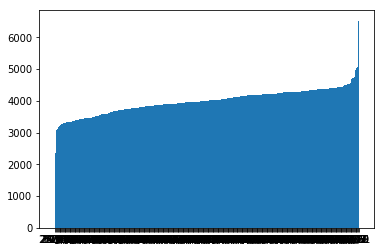

'file:///Users/tommaso/Documents/QuintoSemestre/Data Science/ProgettoDataScienza/Progetto/temp-plot.html'

In [60]:
#Crimini per giorno



In [64]:
mask_gen = posizione_data[:,2] == 1
for i in range (1,13):
    months_counter[i-1]=len(posizione_data[posizione_data[:,2] == i])
print(months_counter)

[123809.  98073. 119010. 118064. 129735. 130575. 135762. 133738. 124067.
 123571. 111834. 108476.]


In [69]:
#Crimini per mese
giorni_mese = [31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
rapporto_crimini_mesi_giorno = list()

for i in range(0,11):
   rapporto_crimini_mesi_giorno.append(months_counter[i] / giorni_mese[i])

mesi = ['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre','Dicembre']
trace1 = go.Bar(
    x = mesi,
    y = rapporto_crimini_mesi_giorno,
    textposition='auto',
    marker=dict(
        color='rgb(255,0,0)',
        line=dict(
            color='rgb(0,0,0)',
            width=1.5),
        ),
    opacity=0.9
)

layout = go.Layout(title="Crimini al giorno in base al mese (Chicago, 2012-2017)")

fig = go.Figure(data = [trace1], layout = layout)
py.iplot(fig)